# Read file

In [1]:
import pandas as pd
A = pd.read_csv("E:/Data Science/digitsnpixels.csv")

In [2]:
A[12:15]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
28*28 #total columns

784

# Declare Y

In [4]:
Y = A["label"].values

In [5]:
print(Y)

[1 0 1 ... 7 6 9]


# Declare X

In [6]:
X = A.iloc[:,1:785].values

In [7]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Display of image by reshaping

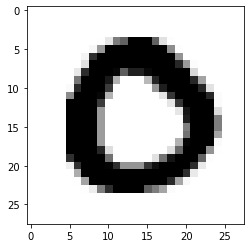

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X[4].reshape(28,28),cmap=plt.cm.binary)

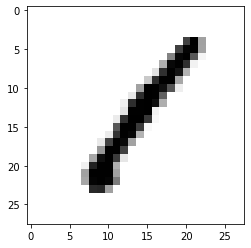

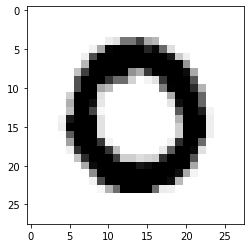

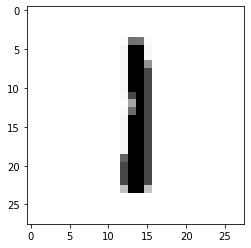

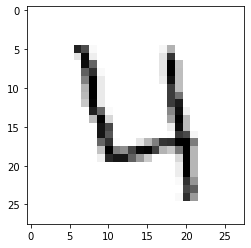

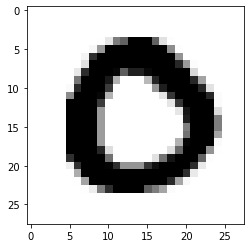

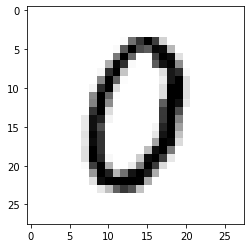

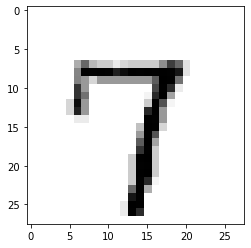

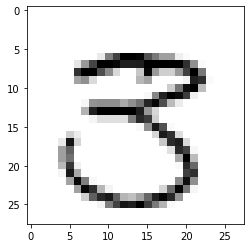

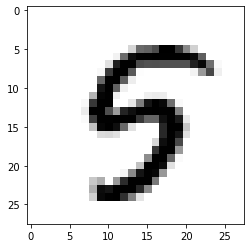

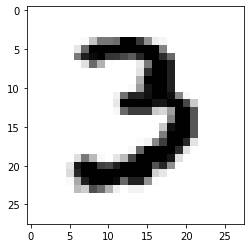

In [9]:
for i in range(0,10,1):
    plt.imshow(X[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()

<AxesSubplot:>

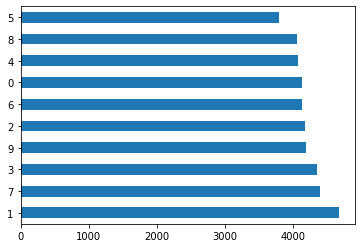

In [10]:
A.label.value_counts().plot(kind="barh")

# Convert Y into categorical

In [11]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)

# Scale X to minmax

In [12]:
X = X/255

# Divide X and Y into training and testing data

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=41)

In [14]:
xtrain.shape

(33600, 784)

In [15]:
xtest.shape

(8400, 784)

# Reshaping xtrain and xtest by 28x28 because 28x28=784

In [16]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

# CNN

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, BatchNormalization

In [18]:
nn = Sequential()
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Flatten())
nn.add(Dense(units=128,activation="relu"))
nn.add(Dense(units=128,activation="relu"))
nn.add(Dense(units=10,activation="softmax"))

In [19]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
nn.fit(xtrain,ytrain,batch_size=64,epochs=2,validation_data=(xtest,ytest))

Epoch 1/2
525/525 [==============================] - 20s 39ms/step - loss: 0.3469 - accuracy: 0.8890 - val_loss: 0.1718 - val_accuracy: 0.9468
Epoch 2/2
525/525 [==============================] - 21s 39ms/step - loss: 0.1203 - accuracy: 0.9614 - val_loss: 0.0724 - val_accuracy: 0.9771


In [20]:
nn.evaluate(xtest,ytest,batch_size=64)

132/132 [==============================] - 1s 11ms/step - loss: 0.0724 - accuracy: 0.9771


[0.0723743736743927, 0.977142870426178]

# Predict the number

In [21]:
from numpy import argmax
pred = nn.predict(xtest)

In [22]:
pred

array([[2.3563764e-04, 5.7956208e-06, 3.7023416e-03, ..., 7.4575564e-07,
        8.3009386e-01, 2.6779400e-02],
       [1.0138837e-06, 3.7213140e-05, 3.7693060e-06, ..., 3.7158686e-06,
        7.6654447e-07, 4.7627160e-05],
       [4.6129447e-09, 8.2626471e-08, 7.4118994e-05, ..., 1.2874380e-08,
        5.3308804e-06, 1.0089526e-05],
       ...,
       [3.2392333e-07, 1.4926433e-09, 2.6379294e-07, ..., 1.2576433e-10,
        2.1864378e-06, 3.9016776e-08],
       [1.8696817e-07, 6.2649669e-08, 1.7920603e-07, ..., 2.4549338e-10,
        6.0514054e-07, 6.8980128e-08],
       [4.1009206e-11, 1.3464219e-09, 1.3480619e-08, ..., 2.0572283e-11,
        3.8125745e-06, 5.9442340e-05]], dtype=float32)

In [23]:
xtest.shape

(8400, 28, 28, 1)

In [24]:
pred = argmax(pred,axis=1)

In [25]:
pred

array([8, 4, 3, ..., 6, 6, 5], dtype=int64)

In [26]:
XT = xtest*255 #inverse minmax scalar

In [27]:
XT

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

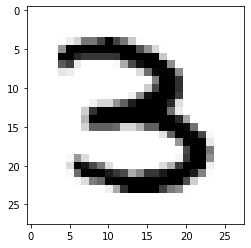

In [28]:
plt.imshow(XT[2].reshape(28,28),cmap=plt.cm.binary)

In [29]:
pred[1]

4

--------------
Predicted value 8
--------------


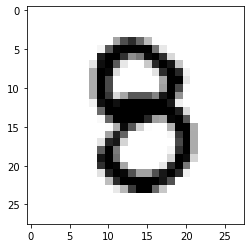

--------------
Predicted value 4
--------------


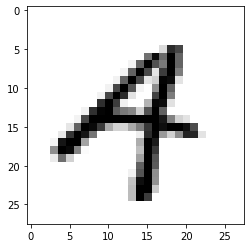

--------------
Predicted value 3
--------------


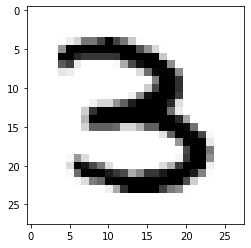

--------------
Predicted value 3
--------------


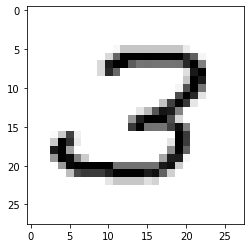

--------------
Predicted value 2
--------------


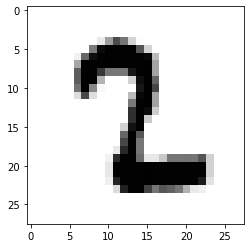

--------------
Predicted value 0
--------------


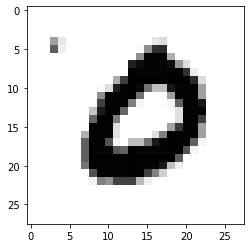

--------------
Predicted value 6
--------------


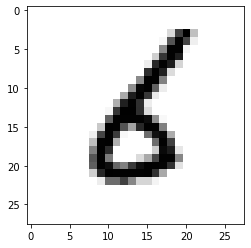

--------------
Predicted value 2
--------------


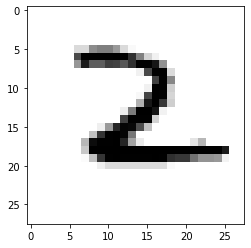

--------------
Predicted value 6
--------------


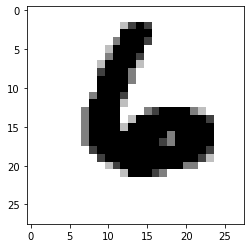

--------------
Predicted value 2
--------------


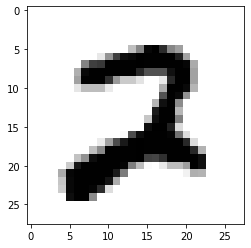

In [30]:
for i in range(0,10,1):
    print("--------------")
    print("Predicted value",pred[i])
    print("--------------")
    plt.imshow(XT[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()